Results for Dataset 1:
                                   MAE           MSE        R²
Linear Regression          1435.054687  3.778802e+06  0.703827
Decision Tree Regression   2962.058824  1.273713e+07  0.001695
Random Forest Regression   1708.781176  5.131841e+06  0.597779
Support Vector Regression  2711.223488  1.363316e+07 -0.068534

Results for Dataset 2:
                                    MAE           MSE        R²
Linear Regression           2943.439818  1.924966e+07  0.883592
Decision Tree Regression    3815.166667  4.940969e+07  0.701205
Random Forest Regression    3033.538750  2.643760e+07  0.840124
Support Vector Regression  10140.675017  2.475783e+08 -0.497177


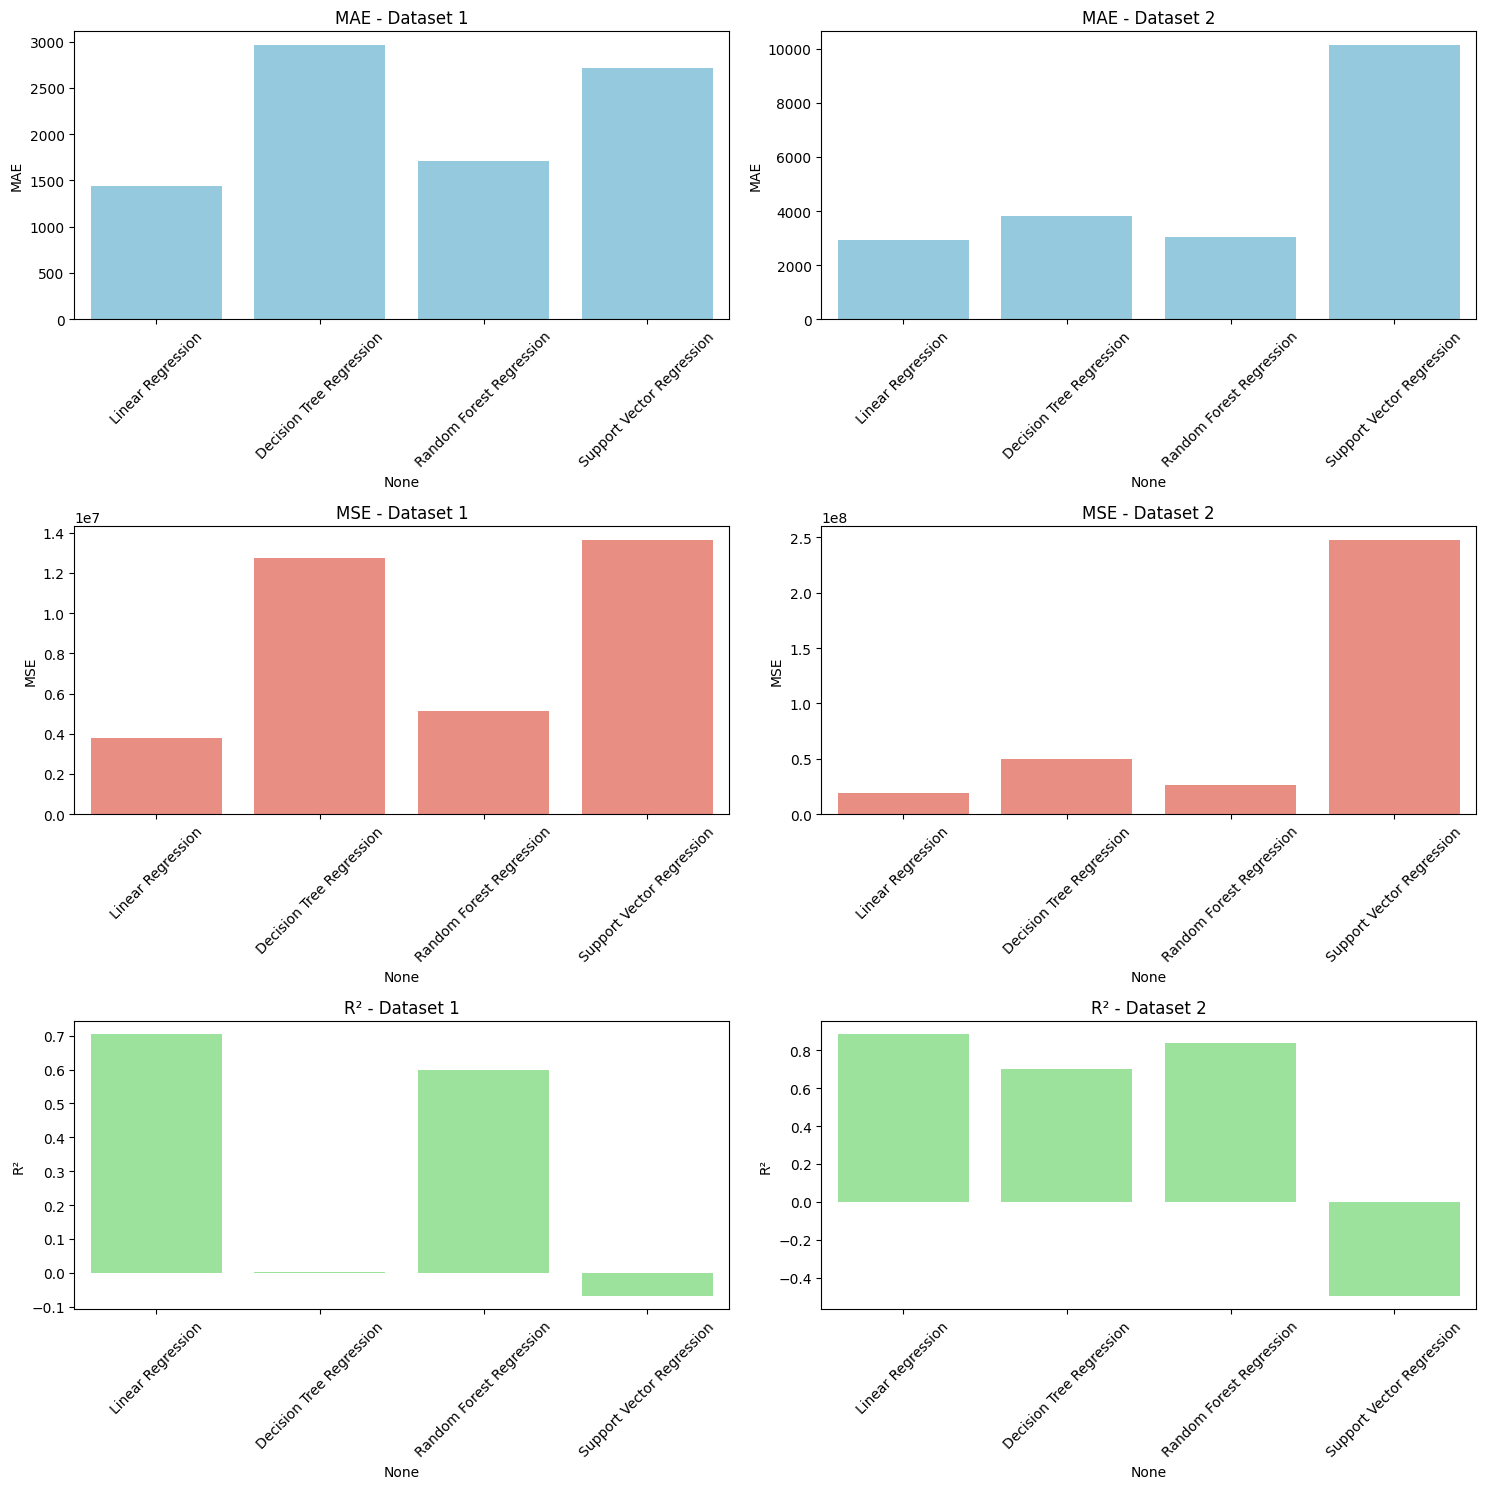

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


dataset1 = pd.read_csv('C:/Users/Bely/Documents/Ml_excercise/Ml_papers/dataset1.csv')  
dataset2 = pd.read_excel('C:/Users/Bely/Documents/Ml_excercise/Ml_papers/dataset2.xlsx')  

X1 = dataset1.drop('Effort', axis=1)
y1 = dataset1['Effort']

X2 = dataset2.drop('  effort', axis=1)
y2 = dataset2['  effort']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR()
}
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

results1 = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X1_train, X1_test, y1_train, y1_test)
    results1[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}

results2 = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X2_train, X2_test, y2_train, y2_test)
    results2[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}

results_df1 = pd.DataFrame(results1).T
results_df2 = pd.DataFrame(results2).T

print("Results for Dataset 1:")
print(results_df1)
print("\nResults for Dataset 2:")
print(results_df2)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x=results_df1.index, y='MAE', data=results_df1, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('MAE - Dataset 1')
axes[0, 0].set_xticks(range(len(results_df1.index)))
axes[0, 0].set_xticklabels(results_df1.index, rotation=45)

sns.barplot(x=results_df1.index, y='MSE', data=results_df1, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('MSE - Dataset 1')
axes[1, 0].set_xticks(range(len(results_df1.index)))
axes[1, 0].set_xticklabels(results_df1.index, rotation=45)

sns.barplot(x=results_df1.index, y='R²', data=results_df1, ax=axes[2, 0], color='lightgreen')
axes[2, 0].set_title('R² - Dataset 1')
axes[2, 0].set_xticks(range(len(results_df1.index)))
axes[2, 0].set_xticklabels(results_df1.index, rotation=45)

sns.barplot(x=results_df2.index, y='MAE', data=results_df2, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('MAE - Dataset 2')
axes[0, 1].set_xticks(range(len(results_df2.index)))
axes[0, 1].set_xticklabels(results_df2.index, rotation=45)

sns.barplot(x=results_df2.index, y='MSE', data=results_df2, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('MSE - Dataset 2')
axes[1, 1].set_xticks(range(len(results_df2.index)))
axes[1, 1].set_xticklabels(results_df2.index, rotation=45)

sns.barplot(x=results_df2.index, y='R²', data=results_df2, ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('R² - Dataset 2')
axes[2, 1].set_xticks(range(len(results_df2.index)))
axes[2, 1].set_xticklabels(results_df2.index, rotation=45)

plt.tight_layout()
plt.show()
V
results_df1.to_csv('results_dataset1.csv')
results_df2.to_csv('results_dataset2.csv')

